# Integrantes del equipo:
- Ángel Oropeza
- Isaac Vivas
- Pedro Arizmendi 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class UtilsData:

    def load_data(file, xs):
        np.random.seed(1)
        datos = np.loadtxt(file)
        np.random.shuffle(datos)
        datos = np.transpose(datos)
        x = datos[:xs,:]
        y = datos[-1:]
        return x, y

    def split_data(x, y, p):
        m = len(y[0])
        limite = int(p * m)
        xTrain, xTest = x[:, :limite], x[:, limite:]
        yTrain, yTest = y[:,:limite], y[:,limite:]
        return xTrain, xTest, yTrain, yTest

    def scatter_data(x, y, title=''):
        color = np.where(y[0] == 0, 'r', np.where(y[0] == 1, 'g', 'y'))
        plt.scatter(x[0], x[1], marker='x', s = 20, c = color)
        plt.title(title)
        plt.show()

x, y = UtilsData.load_data('datos2.txt', 2)
xTrain, xTest, yTrain, yTest = UtilsData.split_data(x, y, 0.8)

print('Tamaño X, Y: ', x.shape, y.shape)
print('X', x)
print('Y', y)

print('xTrain, xTest: ', xTrain.shape, xTest.shape)
print('yTrain, yTest: ', yTrain.shape, yTest.shape)


UtilsData.scatter_data(x, y, 'All')
UtilsData.scatter_data(xTrain, yTrain, 'Train')
UtilsData.scatter_data(xTest, yTest, 'Test')

Tamaño X, Y:  (2, 3000) (1, 3000)
X [[7.08146855 3.57893446 5.34073113 ... 5.6100421  7.85002784 5.09313198]
 [6.19290511 5.53340881 7.32337241 ... 7.08018734 0.84344671 6.00638513]]
Y [[1. 2. 1. ... 1. 0. 1.]]
xTrain, xTest:  (2, 2400) (2, 600)
yTrain, yTest:  (1, 2400) (1, 600)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
class Classifier:
    def __init__(self, x, y, epochs, learning_rate, error, c_class):
        self.epochs = epochs
        self.error = error
        self.c_class = c_class
        self.train_op = tf.keras.optimizers.SGD(learning_rate)
        self.X = tf.constant(x, dtype = tf.float32)
        self.Y = tf.constant(1 * (y == c_class), dtype = tf.float32)
        self.W = tf.Variable([0.]*3, dtype = tf.float32)
    
    def sigmoidal(self, z):
        return 1/(1 + np.exp(-z))

    def modelo(self, W, X):
        return tf.sigmoid(W[0] + W[1]*X[0] + W[2]*X[1])

    def costo(self, W, X, Y):
        return tf.reduce_mean(-Y*tf.math.log(self.modelo(W, X)) - (1 - Y)*tf.math.log(1 - self.modelo(W, X)))

    def costo_minimizar(self):
        return tf.reduce_mean(
            -self.Y*tf.math.log(self.modelo(self.W, self.X)) 
            - (1 - self.Y)*tf.math.log(1 - self.modelo(self.W, self.X)))

    def fit(self):
        hist_error = []
        prev_error = 1000
        for epoch in range(self.epochs):
            error = self.costo(self.W, self.X, self.Y).numpy()
            hist_error.append(error)
            self.train_op.minimize(self.costo_minimizar, var_list = [self.W])
            if abs(prev_error - error) < self.error:
                print(f'Época final: {epoch}')
                break
            prev_error = error
        print(f'[W]: {self.W.numpy()}')

        print(error)
        plt.plot(hist_error)
        plt.show()
    
    def scatter_boundaries(self, x, y):
        # Graficando las fronteras
        x1F, x2F = [], []
        for x1P in np.linspace(0, 10, 100):
            for x2P in np.linspace(0, 10, 100):
                yP = self.sigmoidal(self.W[0] + self.W[1]*x1P + self.W[2]*x2P)
                if (abs(yP - 0.5) < 0.01):
                    x1F.append(x1P)
                    x2F.append(x2P)

        plt.scatter(x1F, x2F, color = 'b', marker = 'o', s = 20)
        color = np.where(y[0] == self.c_class, 'r', 'g')
        plt.scatter(x[0], x[1], marker='x', s = 20, color = color)
        plt.show()
        
    def confidence(self, x, y):
        # Calculando la confianza de clasificación
        num_aciertos = 0
        yT = 1 * (y[0] == self.c_class)
        for i in range(len(y[0])):
            y_gorrito = self.sigmoidal(self.W[0] + self.W[1]*x[0][i] + self.W[2]*x[0][i])
            if y_gorrito < 0.5:
                clase = 0
            else:
                clase = 1
            if clase == yT[i]:
                num_aciertos += 1
        print(f'% de Aciertos: {100*num_aciertos/len(y[0])}')
        return num_aciertos

Época final: 496
[W]: [ 0.21207216  0.52883494 -0.9785141 ]
0.23064913


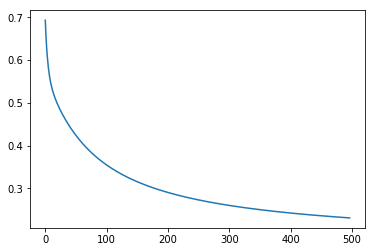

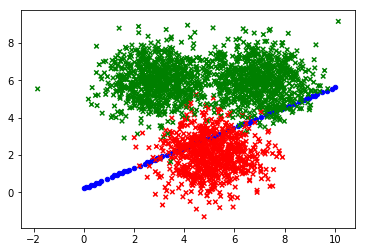

% de Aciertos: 67.0
1608
% de Aciertos: 64.16666666666667
385


In [3]:
c1 = Classifier(xTrain, yTrain, 500, 0.01, 0.0001, 0)
c1.fit()
c1.scatter_boundaries(xTrain, yTrain)
print(c1.confidence(xTrain, yTrain))
print(c1.confidence(xTest, yTest))

[W]: [-7.5074997   0.9166992   0.43655303]
0.20765574


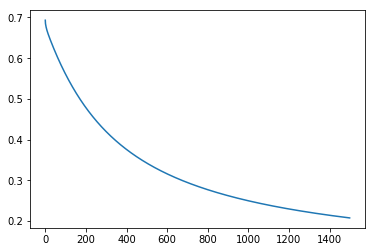

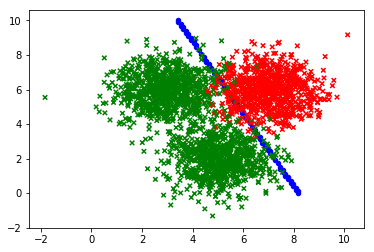

% de Aciertos: 87.375
2097
% de Aciertos: 87.0
522


In [4]:
c2 = Classifier(xTrain, yTrain, 1500, 0.1, 0.00001, 1)
c2.fit()
c2.scatter_boundaries(xTrain, yTrain)
print(c2.confidence(xTrain, yTrain))
print(c2.confidence(xTest, yTest))

Época final: 213
[W]: [ 0.20747477 -1.7198615   1.3385419 ]
0.10549587


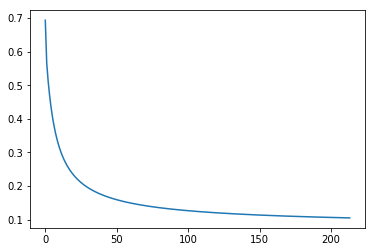

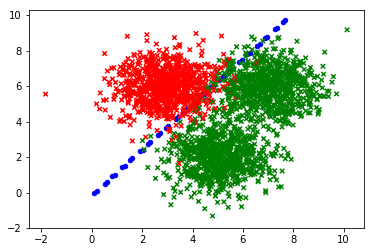

% de Aciertos: 66.41666666666667
1594
% de Aciertos: 69.33333333333333
416


In [5]:
c3 = Classifier(xTrain, yTrain, 500, 0.1, 0.0001, 2)
c3.fit()
c3.scatter_boundaries(xTrain, yTrain)
print(c3.confidence(xTrain, yTrain))
print(c3.confidence(xTest, yTest))